# Maximum Likelihood (part 02)
```
Shivam Kumaran
sc17b122
date 17/11/2020
Computational Astrophysics
```

In [34]:
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
import random as rnd 
plt.style.use('seaborn-dark-palette')
plt.rcParams.update({'font.size':12})
#np.random.seed(3435333422)
rnd.seed(945526237263)

## Histogram Routines

In [35]:
import numpy as np 
def pdf_const_bin(x, bins):
    '''
    generate Probability distribution function corresponding 
    to given samples of random variables x 
    against bins 
    '''
    x = np.asarray(x)
    v_min = np.amin(x)
    v_max = np.amax(x)
    h = (v_max-v_min)/bins
    tot_length = len(x)
    #print(v_min , v_max)
    hist = []
    x_axis = []
    for i in range(bins):
        temp_min = v_min+i*h
        temp_max = v_min+(i+1)*h
        #print(temp_min, temp_max)
        temp = [x_val for x_val in x if ((x_val>temp_min) and(x_val<=temp_max))]
        #print(temp)
        count = (len(temp)/tot_length)/h
        hist.append(count)
        x_axis.append((temp_min+temp_max)/2)
    return(hist , x_axis)


def histogram(x,bins):

    def histogram_const_bin(x, bins):
        x = np.asarray(x)
        v_min = np.amin(x)
        v_max = np.amax(x)
        h = (v_max-v_min)/bins
            #print(v_min , v_max)
        hist = []
        x_axis = []
        for i in range(bins):
            temp_min = v_min+i*h
            temp_max = v_min+(i+1)*h
                #print(temp_min, temp_max)
            temp = [x_val for x_val in x if ((x_val>temp_min) and (x_val<=temp_max))] 
                #print(temp)
            count = len(temp)
            hist.append(count)
            x_axis.append((temp_min+temp_max)/2)
        return(hist , x_axis)

    def histogram_given_bin(x, bins):
        x = np.asarray(x)
        v_min = np.amin(x)
        v_max = np.amax(x)
        h = (v_max-v_min)/bins
            #print(v_min , v_max)
        hist = []
        x_axis = []
        for i in range(len(bins)):
            temp = [x_val for x_val in x if ((x_val>bins[i]) and (x_val<=bins[i+1]))] 
                #print(temp)
            count = len(temp)
            hist.append(count)
                #x_axis.append((temp_min+temp_max)/2)
        return(hist, bins)


    if(type(bins)==int):
        hist , bins = histogram_const_bin(x,bins)
    else:
        hist , bins = histogram_given_bin(x,bins)
    return(hist, bins)



## Generating Samples and Likelihood calculations
Function gen_samples use Monte carlo rejection method to generate random samples corresponding to given PDF

In [36]:
def gen_rand_n(x_min ,x_max , n):
    #import random as rnd 
    x = []
    n = int(n)
    for i in range(n):
        mu = rnd.uniform(0,1)
        xi = x_min + mu*(x_max-x_min)
        x.append(xi)
    if (len(x)==1):
        return x[0]
    else:
        return x

def gen_samples(f,x_min , x_max , y_max , N):
    import numpy as np 
    x_acc = []
    i = 0
    while(i<N):
        x = gen_rand_n(x_min,x_max,1)
        y = gen_rand_n(0,y_max , 1)
        if(y<=f(x)):
            x_acc.append(x)
            i+=1
    return x_acc

def calc_likelihood(pdf , data , log_lik = True , neg = False):
    log_l = 0
    if(log_lik):
        log_l = sum([np.log(pdf(d)) for d in data])
        if(neg):
            return -log_l
        else :
            return (log_l)


## Defining electron scattering distribution

After Normalisation :

$p(cos\theta) = N\times (1+\alpha* cos^2(\theta))$

$N  = 1/(2*(1+\frac{\alpha}{3}))$ 

In [37]:
def scatter_dist(alpha):
    def to_return(x):
        N = 2*(1+alpha/3)
        val = (1+alpha*(x**2))/N
        return val
    return to_return


## Simulating experiment
This function generates  N samples for the given pdf , corresponding to given $\alpha$  

In [38]:
def simulate_scatter(alpha , N):
    y_max = (1+alpha)/(2*(1+alpha/3))
    y = gen_samples(scatter_dist(alpha) , -1 , 1 , y_max , N)
    return y

Generating 500 , and 4000 samples corrsponding to $\alpha = 5.5$

In [39]:
alpha = 5.5
N_1 , N_2 = 500 ,  4000 
y_1 = simulate_scatter(alpha , N_1)
y_2 = simulate_scatter(alpha , N_2)

In [40]:
data = np.loadtxt('list' , delimiter=',')

In [41]:
dist_1 , bins_1 = pdf_const_bin(y_1 , 20)
width_1 = bins_1[1]-bins_1[0]

dist_2 , bins_2 = pdf_const_bin(y_2 , 20)
width_2 = bins_2[1]-bins_2[0]

dist_obs , bins_obs = pdf_const_bin(data , 20)
width_obs = bins_obs[1]-bins_obs[0]

x = np.linspace(-1,1,20)
y_th = scatter_dist(alpha)(x)

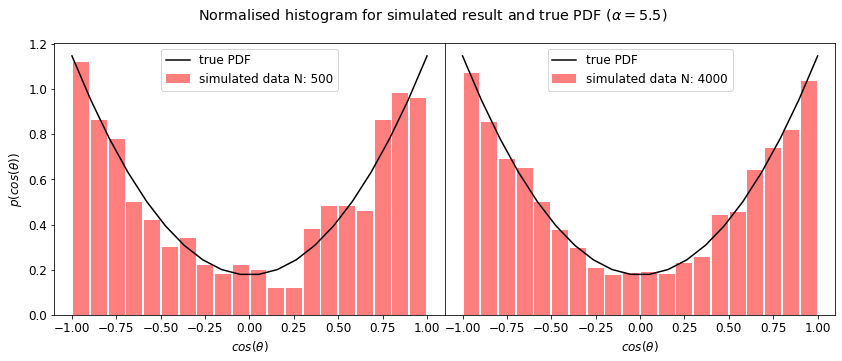

In [42]:
from matplotlib import  gridspec as gs
fig  = plt.figure(figsize=(14,5))
spec = gs.GridSpec(ncols=2 , nrows=1 ,  wspace=0)
ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1] , sharey=ax1)
#ax3 = fig.add_subplot(spec[0,2])

ax1.bar(bins_1, dist_1 ,  width=width_1-0.01 , color='red' , alpha = 0.5 )
ax1.plot(x ,y_th , color='k')
ax1.legend(['true PDF' , 'simulated data N: 500'])
ax1.set_ylabel(r'$p(cos(\theta))$')
ax1.set_xlabel(r'$cos(\theta)$')
ax2.bar(bins_2, dist_2 ,  width=width_2-0.01 , color='red' , alpha = 0.5 )
ax2.plot(x ,y_th , color='k')
ax2.yaxis.set_visible(False)
ax2.set_xlabel(r'$cos(\theta)$')
ax2.legend(['true PDF' , 'simulated data N: 4000'])
fig.suptitle(r'Normalised histogram for simulated result and true PDF $(\alpha=5.5)$')
plt.show()

In [52]:
alpha_itr = np.linspace(1 , 25 , num=250 , endpoint=True )
ll_1 , ll_2 , ll_obs = [] , [] , []

for a in alpha_itr:
    ll_1.append(calc_likelihood(scatter_dist(a) , y_1))
    ll_2.append(calc_likelihood(scatter_dist(a) , y_2))
    ll_obs.append(calc_likelihood(scatter_dist(a) , data))


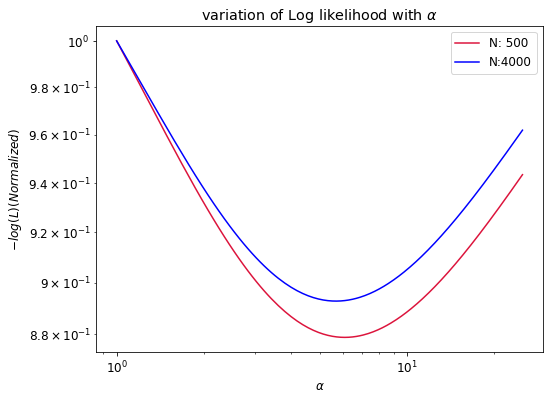

In [53]:
plt.figure(figsize=(8,6))
plt.loglog(alpha_itr , ll_1/np.amin(ll_1) , color='crimson')
plt.loglog(alpha_itr , ll_2/np.amin(ll_2) , color= 'blue')
plt.legend(['N: 500','N:4000' , 'observed data'])
plt.title(r'variation of Log likelihood with $\alpha$')
plt.ylabel(r'$-log(L) (Normalized)$')
plt.xlabel(r'$\alpha$')
#plt.xscale('log')
plt.show()

## Maximizing Log Likelihood
We will find value of alpha which correspond to Maximum of log likelihood corresponding to the cases

(given data , simulated data for N=500 , simulated data for N=4000)

### For maximization 
> Method used :
parameter update is scaled by the gradient at the given point and in the direction of gradient at the given point  , hence step size is adaptive to the gradient and can reach maxima faster without overshooting it. gardients are calulated only till we finds (almost) zero gradient.

$p_{next} = p_{prev}+\nabla_p(log(L)) \times \Delta p$ 

Following function is a more generalized function which allows us to calculate either maximas or minimas of likelihood corresponding to given PDF

In [45]:
def find_extrema(pdf , d , p_min , p_max , type):
    p = p_min
    del_p = 0.1
    prev = calc_likelihood(scatter_dist(p) , d)
    nxt = calc_likelihood(scatter_dist(p+del_p) , d)
    grad = (nxt-prev)/del_p
    
    while(abs(grad)>1e-4):
        prev = calc_likelihood(scatter_dist(p) , d)
        nxt = calc_likelihood(scatter_dist(p+del_p) , d)
        #grd_prev = grad
        grad = (nxt-prev)/del_p
        del_p = 0.1
        if(type=='min'):
            p = p-(grad)*del_p
        elif(type=='max'):
            p = p+(grad)*del_p
        else:
            raise (ValueError('type must be "min" or "max"'))
        #print(p)
    return p 


In [46]:
a_max_given_data = (find_extrema(scatter_dist ,data , 0 , 20 , type='max'))
a_max_data_500 = (find_extrema(scatter_dist ,y_1 , 0 , 20 , type='max'))
a_max_data_4000 = (find_extrema(scatter_dist ,y_2 , 0 , 20 , type= 'max'))


In [47]:
print('By maximum Likelihood , parameters estimated')
print('_______________________________________________')
print('alpha for simulated data (500): {:.4f}'.format(a_max_data_500))
print('alpha estimated for simulated data(4000): {:.4f}'.format(a_max_data_4000))
print('alpha estimated for given data: {:.4f}'.format(a_max_given_data))

By maximum Likelihood , parameters estimated
_______________________________________________
alpha for simulated data (500): 6.0547
alpha estimated for simulated data(4000): 5.6462
alpha estimated for given data: 5.4332


## Uncrtainity estimation
 Around Maxima such that 

 $\sigma_a$ correspond to $\Delta M = 1/2$ , 

 Where $M = log(likelihood)$

 Method :
Varying parameter $\alpha$ by $\Delta \alpha$ on both sides such that $\Delta M = 1/2$  

In [48]:
def cal_uncertanity(fn , data , param_min , param_max , err_side = 'left'):
    d_a = 0.001
    delta_a = 0.0
    a = find_extrema(fn , data , param_min , param_max, type='max' )
    m_max = calc_likelihood(fn(a) , data)
    a = a+d_a
    m_cal = calc_likelihood(fn(a) , data)
    delta_m = m_max-m_cal
    while(delta_m < 0.5):
        if(err_side=='right'):
            a = a + d_a
            delta_a += d_a 
        elif(err_side=='left'):
            a = a - d_a
            delta_a -=d_a
        m_cal = calc_likelihood(fn(a) , data)
        delta_m = m_max - m_cal
        #print(delta_m)
    return delta_a-d_a


In [30]:
err_a_sim_500_l = cal_uncertanity(scatter_dist , y_1 , 0 , 20 , err_side = 'left')
err_a_sim_500_r = cal_uncertanity(scatter_dist , y_1 , 0 , 20 , err_side = 'right')
print('Uncertnity in alpha:for N=500')
print('{:.3f} , {:.3f}'.format(err_a_sim_500_l , err_a_sim_500_r))

Uncertnity in alpha:for N=500
-0.649 , 0.891


In [37]:
err_a_sim_4000_l = cal_uncertanity(scatter_dist , y_2 , 0 , 20 , err_side = 'left')
err_a_sim_4000_r = cal_uncertanity(scatter_dist , y_2 , 0 , 20 , err_side = 'right')
print('Uncertnity in alpha:for N=4000')
print('{:.3f} , {:.3f}'.format(err_a_sim_4000_l , err_a_sim_4000_r))

Uncertnity in alpha:for N=4000
-0.354 , 0.482


In [49]:
err_a_sim_4000_l = cal_uncertanity(scatter_dist , data , 0 , 20 , err_side = 'left')
err_a_sim_4000_r = cal_uncertanity(scatter_dist , data , 0 , 20 , err_side = 'right')
print('Uncertnity in alpha:for given data')
print('{:.3f} , {:.3f}'.format(err_a_sim_4000_l , err_a_sim_4000_r))

Uncertnity in alpha:for given data
-2.630 , 5.841


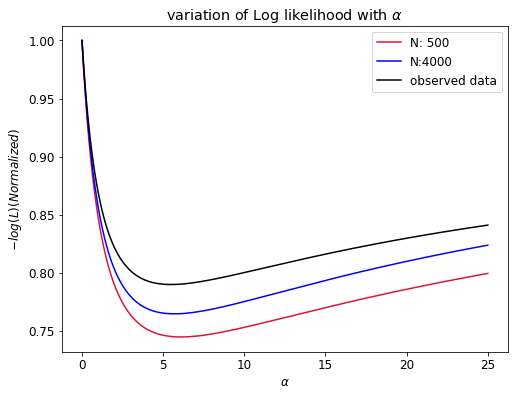

In [50]:
plt.figure(figsize=(8,6))
plt.plot(alpha_itr , ll_1/np.amin(ll_1) , color='crimson')
plt.plot(alpha_itr , ll_2/np.amin(ll_2) , color= 'blue')
plt.plot(alpha_itr , ll_obs/np.amin(ll_obs) , color= 'black')
plt.legend(['N: 500','N:4000' , 'observed data'])
plt.title(r'variation of Log likelihood with $\alpha$')
plt.ylabel(r'$-log(L) (Normalized)$')
plt.xlabel(r'$\alpha$')
#plt.xscale('log')
plt.show()

## Result
For N=500 : $\alpha = 6.411 \substack{+1.529 \\ -1.131}$ 

For N=4000 : $\alpha = 5.788 \substack{+0.482 \\ -0.354}$ 